In [1538]:
import random
import torch
import math
import matplotlib.pyplot as plt

#### 生成数据集 
y= **Xw** + b + c(噪声满足正态分布) 
+ _n个样本数据集，2个特征_
+ w=[25. -30.4] b=1000.2

In [1539]:
def create_data(n,w,b):
    X=torch.normal(0,1,(n,len(w)))
    y=torch.matmul(X,w) + b
    y=y+torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

x,y=create_data(1000,torch.tensor([1.2,-1.4]),0.2)

#### 绘图函数

In [1540]:
def polt_style(axlim=[0,10],color='bule', title='Figure',ylabel='Y', xlabel='X',subplot=111):
    fig = plt.figure()
    ax = fig.add_subplot(subplot)
    ax.set(xlim=axlim, ylim=axlim,title=title,ylabel=ylabel, xlabel=xlabel)
    return ax

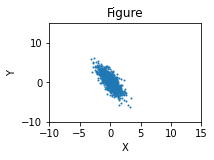

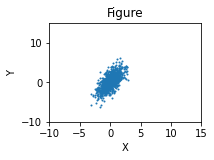

In [1541]:
polt_style(axlim=[-10,15],subplot=221).scatter(x[:, 1].detach().numpy(), y.detach().numpy(), 1)
polt_style(axlim=[-10,15],subplot=222).scatter(x[:, 0].detach().numpy(), y.detach().numpy(), 1)

#### 读取数据集
每次抽取⼀⼩批量样本，并使⽤它们来更新我们的模型

In [1542]:
def read_minexamples(num,x,y):
    #随机化抽样序列
    array=list(range(len(x)))
    random.shuffle(array)
    #抽样
    for i in range(0,len(x),num):
        #每次抽样num个
        getarray = torch.tensor(
        array[i:min(i + num, len(x))])
        #迭代
        yield x[getarray],y[getarray]

#### 初始化模型参数
+ 初始化权重w
+ 初始化偏置b

In [1543]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(w,b)

tensor([[0.0169],
        [0.0086]], requires_grad=True) tensor([0.], requires_grad=True)


#### 定义模型

In [1544]:
def line(w,x,b):
    return torch.matmul(x,w)+b

#### 定义损失函数
+ 平方差损失

In [1545]:
def loss(y_guess,y):
    #print(y_guess,y,1/2*((y_guess-y)**2).sum())
    return (y_guess-y.reshape(y_guess.shape))**2/2


#### 反向传播梯度，
+ 小批量随机梯度下降
+ 学习速率learnr
+ p需要偏导参数
+ num步长，抽样数量
+ **-=** **如果不这样处理偏导会消失**，无法进行梯度下降

In [1546]:
def sgd(p, learnr, num):
    with torch.no_grad():
        for pi in p:
            pi -= learnr * pi.grad / num
            pi.grad.zero_()
    

#### 学习
1. 初始化参数
2. 重复训练
    1. 计算梯度
    2. 更新权重

In [1547]:
#学习率
learnr=0.03
#循环训练次数
learn_num=100
#抽样个数
minnum = 10

In [1548]:
for num in range(learn_num):
    for i, j in read_minexamples(minnum, x, y):
        #求损失
        l = loss(line(w, i, b), j)
        #从y反向传播
        l.sum().backward()
        #求梯度
        sgd([w, b], learnr, minnum)
    with torch.no_grad():
        train_l = loss(line(w, x, b), y)
    print(f'num {num + 1}, loss {float(train_l.mean()):f}')
    print(w,'\t',b)


num 1, loss 0.004288
tensor([[ 1.1466],
        [-1.3230]], requires_grad=True) 	 tensor([0.1954], requires_grad=True)
num 2, loss 0.000058
tensor([[ 1.1974],
        [-1.3952]], requires_grad=True) 	 tensor([0.2002], requires_grad=True)
num 3, loss 0.000045
tensor([[ 1.1996],
        [-1.3995]], requires_grad=True) 	 tensor([0.2000], requires_grad=True)
num 4, loss 0.000046
tensor([[ 1.1995],
        [-1.3996]], requires_grad=True) 	 tensor([0.2004], requires_grad=True)
num 5, loss 0.000045
tensor([[ 1.1999],
        [-1.3995]], requires_grad=True) 	 tensor([0.2002], requires_grad=True)
num 6, loss 0.000045
tensor([[ 1.2003],
        [-1.3997]], requires_grad=True) 	 tensor([0.1999], requires_grad=True)
num 7, loss 0.000046
tensor([[ 1.2004],
        [-1.3994]], requires_grad=True) 	 tensor([0.2003], requires_grad=True)
num 8, loss 0.000046
tensor([[ 1.2004],
        [-1.3996]], requires_grad=True) 	 tensor([0.2003], requires_grad=True)
num 9, loss 0.000045
tensor([[ 1.2001],
        